In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from google.colab import drive
drive.mount("/content/drive/")

# you may need to change the following depending on where you uploaded the file
%cd '/content/drive/MyDrive/Colab Notebooks/DS340W'
!pwd #Prints the present working directory

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/DS340W
/content/drive/MyDrive/Colab Notebooks/DS340W


In [4]:
df = pd.read_csv('cleaned_property_data.csv')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  amenities            1615 non-null   object 
 11  maid_room            1905 non-null   bool   
 12  unfurnished          1905 non-null   bool   
 13  balcony              1905 non-null   bool   
 14  barbecue_area        1905 non-null   bool   
 15  built_in_wardrobes   1905 non-null   b

In [5]:
df = df.drop('amenities', axis= 1)

In [6]:
df['quality'].unique()


array(['Medium', 'Low', 'High', 'Ultra'], dtype=object)

## **Encode Categorical data**

In [7]:
# Define the ordinal mapping dictionary
ordinal_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Ultra': 3
}

# Apply ordinal encoding to the 'quality' column
df['quality'] = df['quality'].map(ordinal_mapping)

df = pd.get_dummies(df, columns = ['neighborhood'])
print(df)

           id   latitude  longitude    price  size_in_sqft  price_per_sqft  \
0     5528049  25.113208  55.138932  2700000          1079         2502.32   
1     6008529  25.106809  55.151201  2850000          1582         1801.52   
2     6034542  25.063302  55.137728  1150000          1951          589.44   
3     6326063  25.227295  55.341761  2850000          2020         1410.89   
4     6356778  25.114275  55.139764  1729200           507         3410.65   
...       ...        ...        ...      ...           ...             ...   
1900  7705450  25.176892  55.310712  1500000          1087         1379.94   
1901  7706287  25.166145  55.276684  1230000           760         1618.42   
1902  7706389  25.206500  55.345056  2900000          1930         1502.59   
1903  7706591  25.073858  55.229844   675000           740          912.16   
1904  7706643  25.079130  55.154713   760887           800          951.11   

      no_of_bedrooms  no_of_bathrooms  quality  maid_room  ... 

# **Decision Tree Regressor**

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Copy the dataset
data = df.copy()

# Split the data into features (X) and target variable (y)
X = data.drop(['id', 'price'], axis=1)  # Features
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=51)

# Initialize the decision tree regressor
dt_regressor = DecisionTreeRegressor()

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Calculate R^2 score
r2_decision_tree = r2_score(y_test, y_pred)
print("R^2 Score:", r2_decision_tree)

R^2 Score: 0.9649359049867


# **Random Forest**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# Copy the dataset
data = df

# Drop columns not needed for prediction
X = data.drop(['id', 'price'], axis=1)
y = data['price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=51)

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict prices
y_pred = rf_regressor.predict(X_test)

# Calculate R^2 score
r2_random_forest = r2_score(y_test, y_pred)
print("R^2 Score:", r2_random_forest)


R^2 Score: 0.9868434037944521


# **KNN**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Copy the dataset
data = df

# Drop columns not needed for prediction
X = data.drop(['id', 'price'], axis=1)
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=51)

# Train the KNN model
k = 17  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate R^2 score
r2_knn = r2_score(y_test, y_pred)
print("R^2 Score:", r2_knn)

R^2 Score: 0.9379318095020847


# **Linear Regression**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Copy the dataset
data = df

# Prepare the features and target variable
X = data.drop(columns=['id', 'price'])  # Features
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=51)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the R-squared (R2) score
r2_linear_reg = r2_score(y_test, y_pred)
print("R^2 score:", r2_linear_reg)

R^2 score: 0.9196621671199735


# **Support Vector Regression**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

# Copy the dataset
data = df

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['id', 'price'])  # Exclude non-numeric and non-useful columns
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=51)

# Train the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Calculate R-squared score
r2_svr = r2_score(y_test, y_pred)
print("R^2 score:", r2_svr)


R^2 score: 0.7130553097863839


# **Boosted Regression Trees**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Copy the dataset
data = df

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['id', 'price'])  # Exclude non-numeric and non-useful columns
y = data['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=51)

# Initializing the Gradient Boosting Regressor
boosted_regressor = GradientBoostingRegressor(random_state=42)

# Fitting the model to the training data
boosted_regressor.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = boosted_regressor.predict(X_test)

# Calculating the R^2 score
r2_boosted_trees = r2_score(y_test, y_pred)
print("R^2 Score:", r2_boosted_trees)

R^2 Score: 0.9702231201119202


# **Lasso Regression**

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Copy the dataset
data = df

# Prepare the features and target variable
X = data.drop(columns=['id', 'price'])  # Features
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=51)

# Initialize the lasso regression model
model = Lasso(alpha=105, random_state=50)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the R-squared (R2) score
r2_lasso = r2_score(y_test, y_pred)
print("R^2 score:", r2_lasso)

R^2 score: 0.921563875461565


# **Elastic Regression**

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

# Copy the dataset
data = df

# Prepare the features and target variable
X = data.drop(columns=['id', 'price'])  # Features
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=51)

# Initialize the ElasticNet regression model
model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the R-squared (R2) score
r2_elasticnet = r2_score(y_test, y_pred)
print("R^2 score:", r2_elasticnet)

R^2 score: 0.908343318044503


# **Comparison**

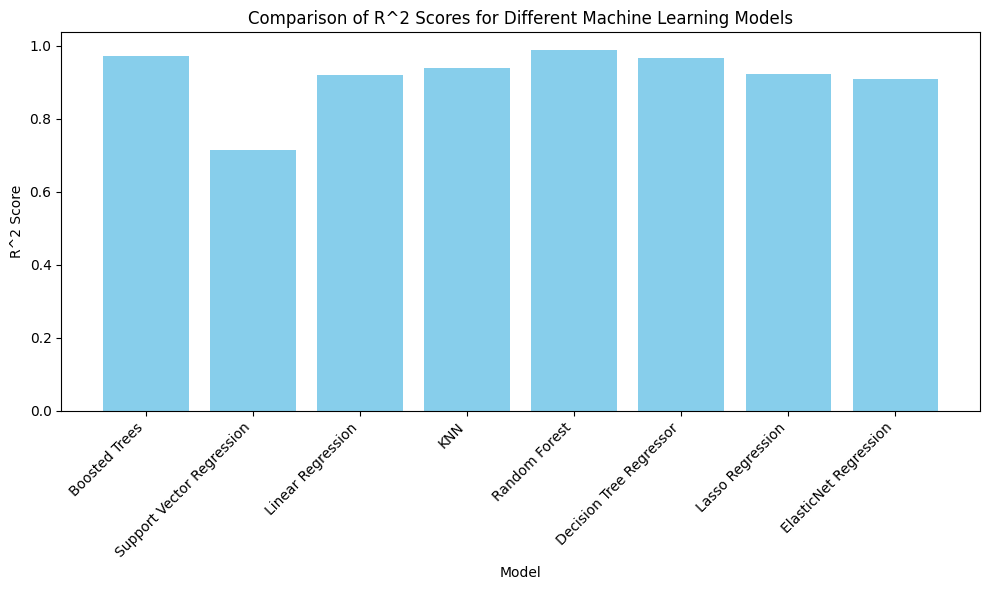

In [16]:
import matplotlib.pyplot as plt

# List of model names
models = ['Boosted Trees', 'Support Vector Regression', 'Linear Regression',
          'KNN', 'Random Forest', 'Decision Tree Regressor', 'Lasso Regression', 'ElasticNet Regression']

# Corresponding R^2 scores
r2_scores = [r2_boosted_trees, r2_svr, r2_linear_reg, r2_knn, r2_random_forest,
             r2_decision_tree, r2_lasso, r2_elasticnet]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.title('Comparison of R^2 Scores for Different Machine Learning Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()